In [1]:
import utils
# utils.assign_free_gpus()
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import tqdm
import numpy as np
import dataloaders
import torchvision
from trainer import Trainer
torch.random.manual_seed(0)
np.random.seed(0)

### Dataset

In [2]:
# Load the dataset and print some stats
batch_size = 64

image_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])

dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)
example_images, _ = next(iter(dataloader_train))
print(f"The tensor containing the images has shape: {example_images.shape} (batch size, number of color channels, height, width)",
      f"The maximum value in the image is {example_images.max()}, minimum: {example_images.min()}", sep="\n\t")

The tensor containing the images has shape: torch.Size([64, 1, 28, 28]) (batch size, number of color channels, height, width)
	The maximum value in the image is 1.0, minimum: 0.0


In [3]:
def create_model():
    """
        Initializes the mode. Edit the code below if you would like to change the model.
    """
    model = nn.Sequential(
        nn.Flatten(), # Flattens the image from shape (batch_size, C, Height, width) to (batch_size, C*height*width)
        nn.Linear(28*28*1, 10)
        # No need to include softmax, as this is already combined in the loss function
    )
    # Transfer model to GPU memory if a GPU is available
    model = utils.to_cuda(model)
    return model


model = create_model()

In [4]:
# Test if the model is able to do a single forward pass
example_images = utils.to_cuda(example_images)
output = model(example_images)
print("Output shape:", output.shape)
expected_shape = (batch_size, 10) # 10 since mnist has 10 different classes
assert output.shape == expected_shape,    f"Expected shape: {expected_shape}, but got: {output.shape}"

Output shape: torch.Size([64, 10])


### Hyperparameters & Loss function

In [5]:
# Hyperparameters
learning_rate = .0192
num_epochs = 5


# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)

### Train model

In [6]:
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict, test_loss_dict = trainer.train(num_epochs)

Training epoch 4: 100%|██████████| 938/938 [00:07<00:00, 121.06it/s]


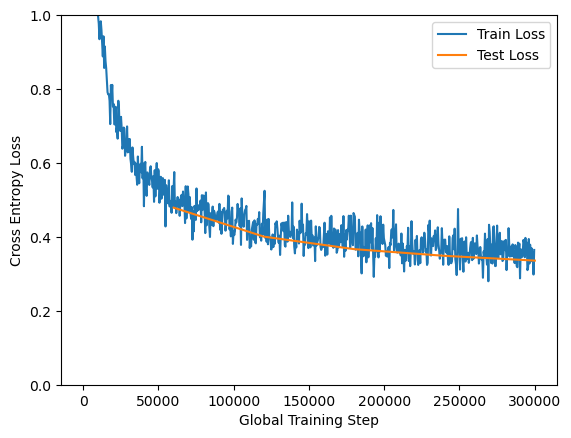

Final Test loss: 0.335831789121886. Final Test accuracy: 0.9084


In [7]:
# We can now plot the training loss with our utility script

# Plot loss
utils.plot_loss(train_loss_dict, label="Train Loss")
utils.plot_loss(test_loss_dict, label="Test Loss")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

## Plotting example

In [8]:
# You can delete the remaining code of this notebook, as this is just to illustrate one method to solve the assignment tasks.


# This example code is here to illustrate how you can plot two different models to compare them.
# Lets change a small part of our model: the number of epochs trained (NOTE, use 5 epochs for your experiments in the assignment.)

# We reset the manual seed to 0, such that the model parameters are initialized with the same random number generator.
torch.random.manual_seed(0)
np.random.seed(0)


dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)
model = create_model()

learning_rate = .0192
num_epochs = 6

# Redefine optimizer, as we have a new model.
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict_6epochs, test_loss_dict_6epochs = trainer.train(num_epochs)
num_epochs = 5

Training epoch 5: 100%|██████████| 938/938 [00:07<00:00, 131.01it/s]


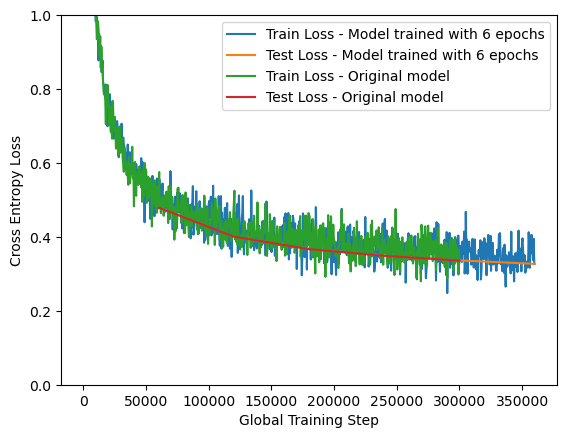

Final Test loss: 0.32698613754028727. Final Test accuracy: 0.9104


In [9]:
# We can now plot the two models against eachother

# Plot loss
utils.plot_loss(train_loss_dict_6epochs, label="Train Loss - Model trained with 6 epochs")
utils.plot_loss(test_loss_dict_6epochs, label="Test Loss - Model trained with 6 epochs")
utils.plot_loss(train_loss_dict, label="Train Loss - Original model")
utils.plot_loss(test_loss_dict, label="Test Loss - Original model")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

### Task A

In [10]:
# Create a model
model_1 = create_model()

# Redefine optimizer, as we have a new model.
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr=learning_rate)

# Train model
num_epochs = 5
trainer = Trainer(
  model=model_1,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict_a_1, test_loss_dict_a_1 = trainer.train(num_epochs)

Training epoch 4: 100%|██████████| 938/938 [00:08<00:00, 111.97it/s]


In [11]:
# Create a model
model_2 = create_model()

# Redefine the dataloader
image_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=0.5, std=0.5),
])
dataloader_train_normalized, dataloader_test_normalized = dataloaders.load_dataset(batch_size, image_transform)


# Redefine optimizer, as we have a new model.
optimizer_2 = torch.optim.SGD(model_2.parameters(),
                            lr=learning_rate)

# Train model
num_epochs = 5
trainer_2 = Trainer(
  model=model_2,
  dataloader_train=dataloader_train_normalized,
  dataloader_test=dataloader_test_normalized,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer_2
)
train_loss_dict_a_2, test_loss_dict_a_2 = trainer_2.train(num_epochs)

Training epoch 0:   0%|          | 0/938 [00:00<?, ?it/s]

Training epoch 4: 100%|██████████| 938/938 [00:11<00:00, 80.82it/s]


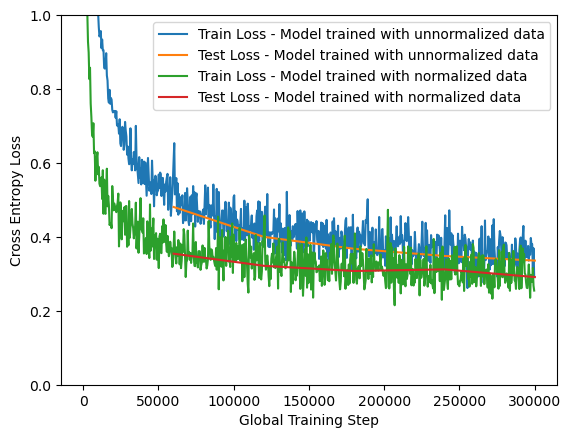

In [12]:
# Plot loss
utils.plot_loss(train_loss_dict_a_1, label="Train Loss - Model trained with unnormalized data")
utils.plot_loss(test_loss_dict_a_1, label="Test Loss - Model trained with unnormalized data")
utils.plot_loss(train_loss_dict_a_2, label="Train Loss - Model trained with normalized data")
utils.plot_loss(test_loss_dict_a_2, label="Test Loss - Model trained with normalized data")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

In [13]:
# Compute final accuracy and loss
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model_1, loss_function)
print("Model 1 - Before Data Normalization")
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")
print("")

# Compute final accuracy and loss
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test_normalized, model_2, loss_function)
print("Model 2 - After Data Normalization")
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

Model 1 - Before Data Normalization
Final Test loss: 0.3358879279416458. Final Test accuracy: 0.9085

Model 2 - After Data Normalization
Final Test loss: 0.2913005522980242. Final Test accuracy: 0.9156


### Task B

In [14]:
weight = list(model_2.children())[1].weight.cpu().data
weight = weight.reshape(10,28,28)

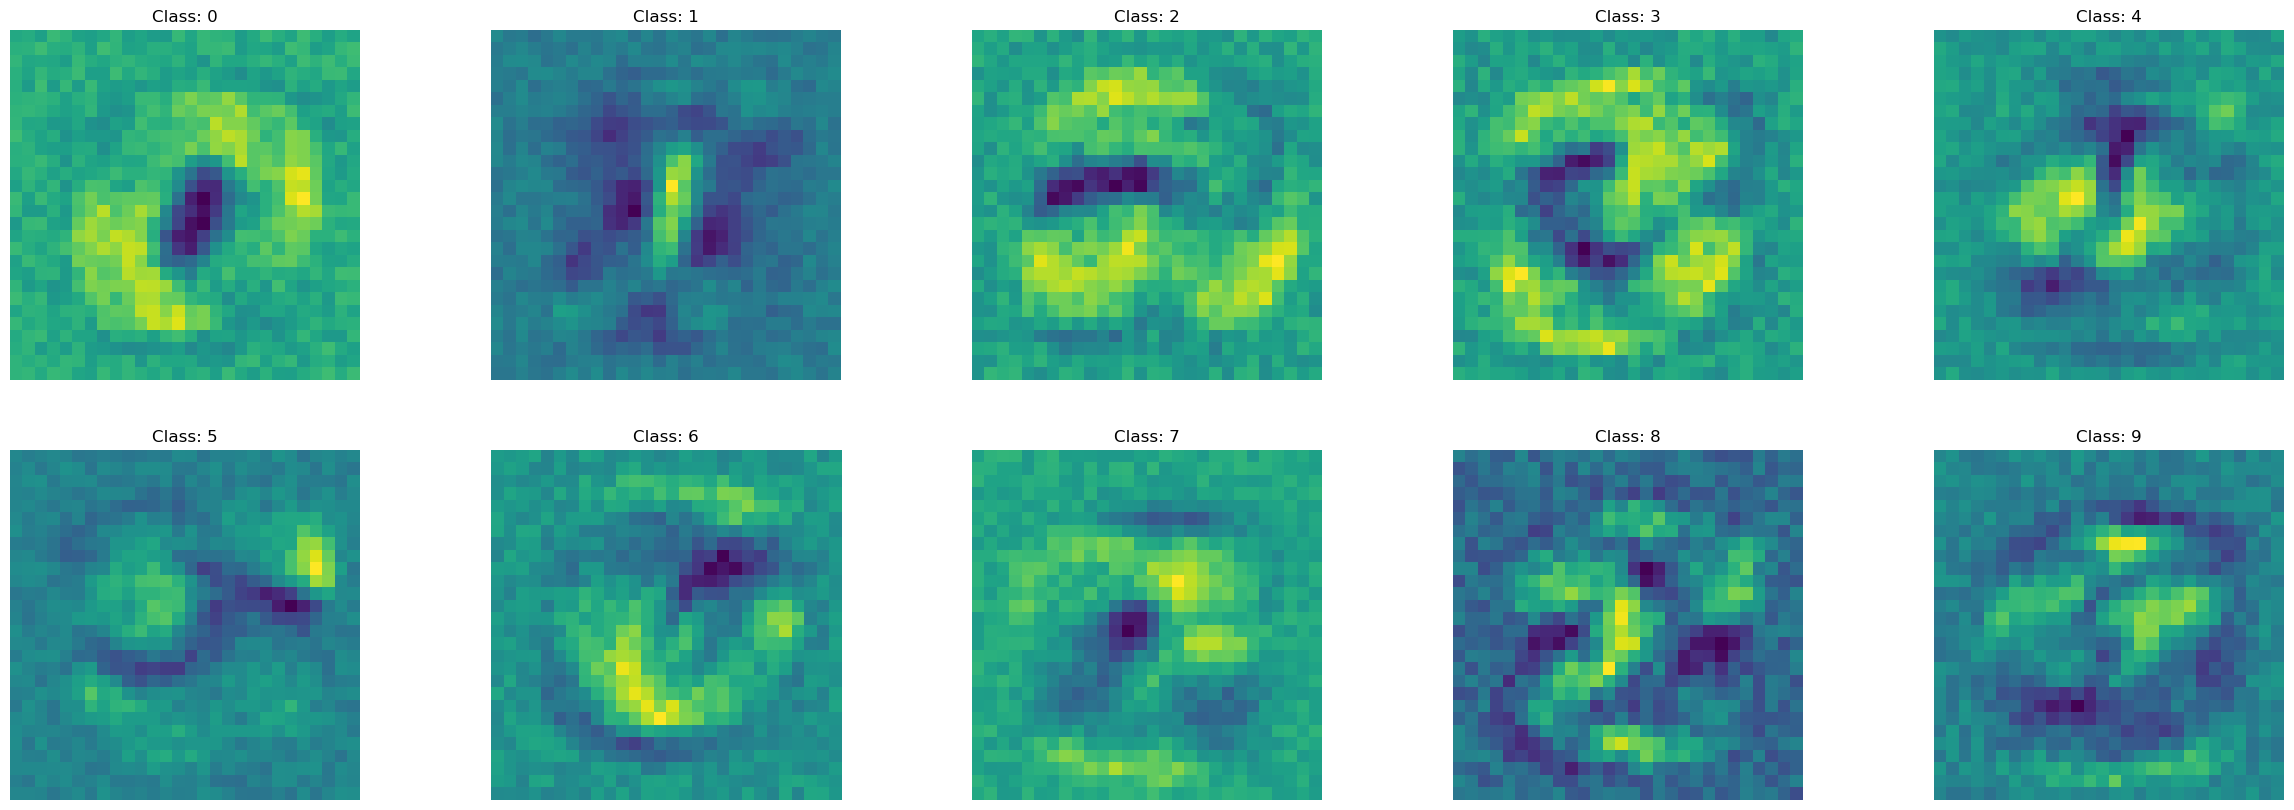

In [15]:
fig, ax = plt.subplots(2,5, figsize=(30,10))

for i in range(2):
    for j in range(5):
        # print((i*5)+j)
        ax[i,j].imshow(weight[(i*5)+j].numpy())
        ax[i,j].set_axis_off()
        ax[i,j].set_title(f"Class: {(i*5)+j}")

plt.savefig("image_solutions/task_4b.png")

### Task C

In [16]:
# Create a model
model_3 = create_model()

# Redefine optimizer, as we have a new model.
new_learning_rate = 1
optimizer_3 = torch.optim.SGD(model_3.parameters(),
                            lr=new_learning_rate)

# Train model
trainer_3 = Trainer(
  model=model_3,
  dataloader_train=dataloader_train_normalized,
  dataloader_test=dataloader_test_normalized,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer_3
)
train_loss_dict_c_1, test_loss_dict_c_1 = trainer_3.train(num_epochs)

Training epoch 4: 100%|██████████| 938/938 [00:12<00:00, 76.30it/s]


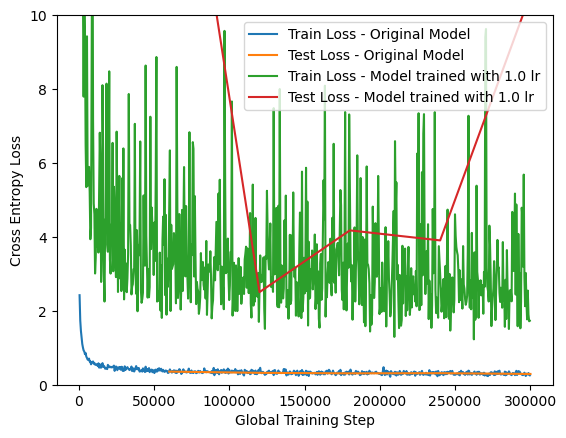

In [17]:
# Plot loss
utils.plot_loss(train_loss_dict_a_2, label="Train Loss - Original Model")
utils.plot_loss(test_loss_dict_a_2, label="Test Loss - Original Model")
utils.plot_loss(train_loss_dict_c_1, label="Train Loss - Model trained with 1.0 lr")
utils.plot_loss(test_loss_dict_c_1, label="Test Loss - Model trained with 1.0 lr")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 10])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4c.png")

plt.show()

In [18]:
# Compute final accuracy and loss
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test_normalized, model_3, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

Final Test loss: 10.56213735167388. Final Test accuracy: 0.7118


### Task D

In [19]:
def modified_create_model():
    """
        Initializes the mode. Edit the code below if you would like to change the model.
    """
    model = nn.Sequential(
        nn.Flatten(), # Flattens the image from shape (batch_size, C, Height, width) to (batch_size, C*height*width)
        nn.Linear(28*28*1, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
        # No need to include softmax, as this is already combined in the loss function
    )
    # Transfer model to GPU memory if a GPU is available
    model = utils.to_cuda(model)
    return model

In [20]:
# Create a model
model_4 = modified_create_model()

# Redefine optimizer, as we have a new model.
optimizer_4 = torch.optim.SGD(model_4.parameters(),
                            lr=learning_rate)

# Train model
trainer_4 = Trainer(
  model=model_4,
  dataloader_train=dataloader_train_normalized,
  dataloader_test=dataloader_test_normalized,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer_4
)
train_loss_dict_d_1, test_loss_dict_d_1 = trainer_4.train(num_epochs)

Training epoch 4: 100%|██████████| 938/938 [00:13<00:00, 71.84it/s]


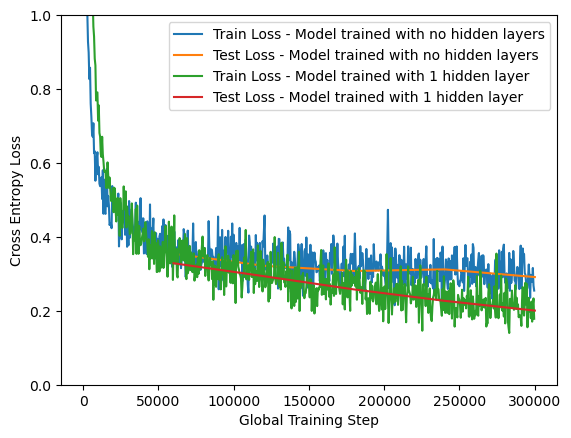

In [21]:
# Plot loss
utils.plot_loss(train_loss_dict_a_2, label="Train Loss - Model trained with no hidden layers")
utils.plot_loss(test_loss_dict_a_2, label="Test Loss - Model trained with no hidden layers")
utils.plot_loss(train_loss_dict_d_1, label="Train Loss - Model trained with 1 hidden layer")
utils.plot_loss(test_loss_dict_d_1, label="Test Loss - Model trained with 1 hidden layer")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4d.png")

plt.show()

In [22]:
# Compute final accuracy and loss
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test_normalized, model_2, loss_function)
print("Model 1 - No Hidden Layer")
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

print("")

# Compute final accuracy and loss
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test_normalized, model_4, loss_function)
print("Model 2 - 1 Hidden Layer")
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

Model 1 - No Hidden Layer
Final Test loss: 0.2913005522980242. Final Test accuracy: 0.9156

Model 2 - 1 Hidden Layer
Final Test loss: 0.20060523262449131. Final Test accuracy: 0.9409
